In [1]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from functionalities import dataloader as dl
from functionalities import tracker as tk
from architecture import INN as inn
from functionalities import CIFAR_coder_loss as cl
from functionalities import trainer as tr
from functionalities import filemanager as fm
from functionalities import plot as pl
from functionalities import gpu 

/export/home/lardizzo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
num_epoch = 8
batch_size = 32
latent_dim_lst = [2 ** x for x in range(0, 15, 2)]
#latent_dim = 300
number_dev = 5
lr_init = 1e-3
l2_reg  = 1e-6
milestones = [6, 7, 8]
modelname = 'celeba_INN_com_bottleneck'
get_model = inn.celeba_inn_com
image_size = 128

device = gpu.get_device(number_dev)

In [3]:

IMAGE_PATH = './img_align_celeba/'
transform = transforms.Compose([
    #transforms.Scale(image_size),
    transforms.Resize(image_size),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = ImageFolder(IMAGE_PATH, transform)
trainloader, testloader = dl.split_dataset(dataset, 0.2, batch_size, False)

In [8]:
model, model_params, track, MMD_loss = tr.init_model(get_model, latent_dim, 'l1', device, a_distr=0, a_disen=0)
optimizer, scheduler = tr.init_training(model_params, lr_init, l2_reg, milestones)

NameError: name 'latent_dim' is not defined

Epoch: 1
Training:


A Jupyter Widget


Loss: 0.088 	 L_rec: 0.087 	 L_dist: 0.000 	 L_spar: 0.001 	 L_disen: 0.000


Compute and record loss on test set:


A Jupyter Widget


Loss: 6.454 	 L_rec: 6.410 	 L_spar: 0.000 	 L_dist: 0.044 	 L_disen: 0.000
latent image mean: -0.003 	 latent image std: 0.447
Original Image:


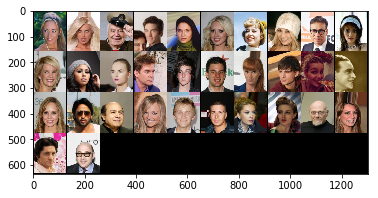

Reconstructed Image:


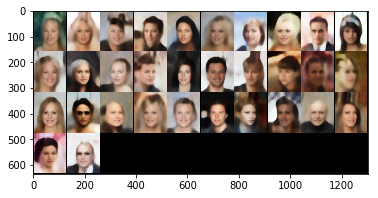

Difference:


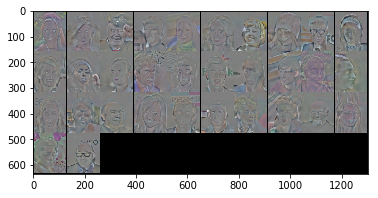



--------------------------------------------------------------------------------


Epoch: 2
Training:


A Jupyter Widget


Loss: 0.060 	 L_rec: 0.060 	 L_dist: 0.000 	 L_spar: 0.000 	 L_disen: 0.000


Compute and record loss on test set:


A Jupyter Widget


Loss: 5.680 	 L_rec: 5.641 	 L_spar: 0.000 	 L_dist: 0.039 	 L_disen: 0.000
latent image mean: -0.015 	 latent image std: 0.568


--------------------------------------------------------------------------------


Epoch: 3
Training:


A Jupyter Widget

In [ ]:
model = tr.train(num_epoch, model, modelname, MMD_loss, optimizer, scheduler, latent_dim, trainloader, None, testloader, track, device)

In [ ]:
model = tr.train_bottleneck(num_epoch, get_model, 'l1', modelname, milestones, latent_dim_lst, trainloader, None, 
                            testloader, a_distr=0, a_disen=0, lr_init=lr_init, l2_reg=l2_reg, device=device, 
                            save_model=True, num_img=25, grid_row_size=5)



Start Training with latent dimension: 1


Node r1 has following input dimensions:
	 Output #0 of node input: (3, 156, 128)

Node conv11 has following input dimensions:
	 Output #0 of node r1: (12, 78, 64)

Node conv12 has following input dimensions:
	 Output #0 of node conv11: (12, 78, 64)

Node conv13 has following input dimensions:
	 Output #0 of node conv12: (12, 78, 64)

Node r2 has following input dimensions:
	 Output #0 of node conv13: (12, 78, 64)

Node conv21 has following input dimensions:
	 Output #0 of node r2: (48, 39, 32)

Node conv22 has following input dimensions:
	 Output #0 of node conv21: (48, 39, 32)

Node conv23 has following input dimensions:
	 Output #0 of node conv22: (48, 39, 32)

Node r3 has following input dimensions:
	 Output #0 of node conv23: (48, 39, 32)

internal_size: 200
internal_size: 200
internal_size: 200
internal_size: 200
Node fc has following input dimensions:
	 Output #0 of node r3: (59904,)

Node r4 has following input dimensions:
	 Output #0 

A Jupyter Widget

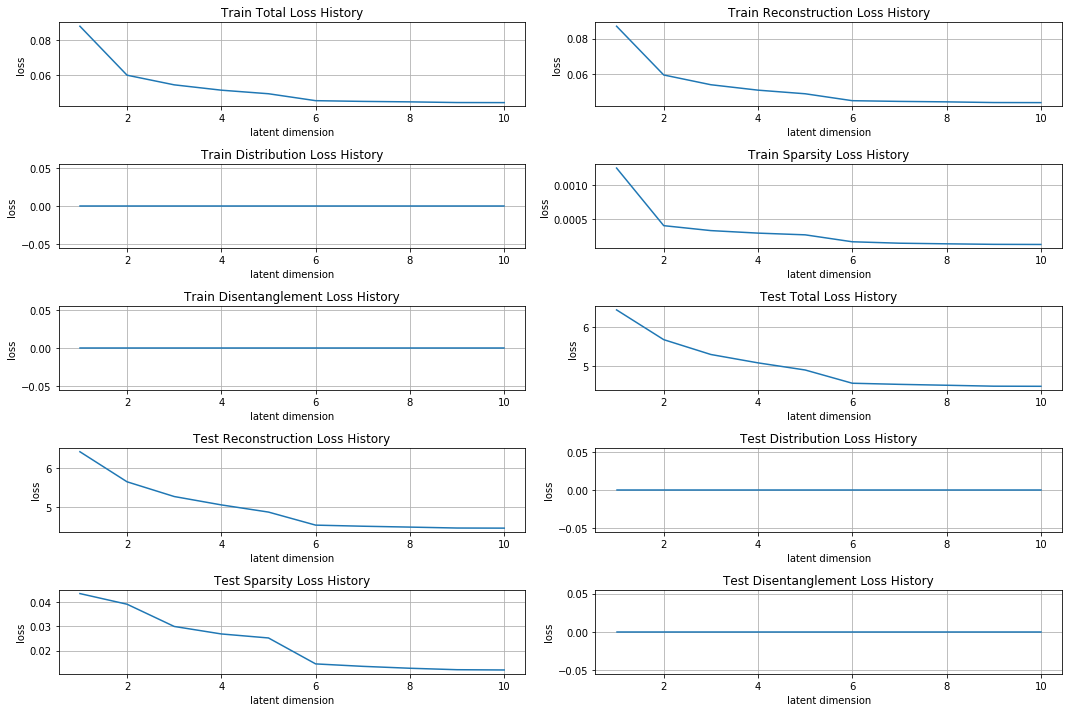

In [6]:
train_tot, train_rec, train_dist, train_spar, train_disen = fm.load_variable('train_loss_{}_{}'.format(modelname, num_epoch), modelname)
test_tot, test_rec, test_dist, test_spar, test_disen = fm.load_variable('test_loss_{}_{}'.format(modelname, num_epoch), modelname)
y = [train_tot, train_rec, train_dist, train_spar, train_disen, test_tot, test_rec, test_dist, test_spar, test_disen]
x = []
for loss in y:
    x.append([x for x in range(1, num_epoch+1)])

pl.plot(x, y, ['latent dimension']*len(x), ['loss']*len(y), ['train_tot', 'train_rec', 'train_dist', 'train_spar', 'train_disen', 'test_tot', 'test_rec', 'test_dist', 'test_spar', 'test_disen'], 
    ['Train Total Loss History', 'Train Reconstruction Loss History', 'Train Distribution Loss History', 'Train Sparsity Loss History', 'Train Disentanglement Loss History', 'Test Total Loss History', 'Test Reconstruction Loss History', 'Test Distribution Loss History', 'Test Sparsity Loss History', 'Test Disentanglement Loss History'], modelname + "_Loss_History", (5, 2)) 

In [ ]:
for lat_dim in latent_dim_lst:
    print("Latent Dimension: ", lat_dim)
    #print(modelname + "_{}".format(lat_dim), '{}_{}_{}'.format(modelname, lat_dim, num_epoch))
    #model = fm.load_model('{}_{}_{}'.format(modelname, lat_dim, num_epoch), modelname + "_{}".format(lat_dim))
    model = get_model().to(device)
    model = fm.load_weight(model, '{}_{}_{}'.format(modelname, lat_dim, num_epoch), '{}_bottleneck'.format(modelname))
    pl.plot_diff(model, trainloader, lat_dim, device, 100, 10)

Node r1 has following input dimensions:
	 Output #0 of node input: (3, 156, 128)

Node conv11 has following input dimensions:
	 Output #0 of node r1: (12, 78, 64)

Node conv12 has following input dimensions:
	 Output #0 of node conv11: (12, 78, 64)

Node conv13 has following input dimensions:
	 Output #0 of node conv12: (12, 78, 64)

Node r2 has following input dimensions:
	 Output #0 of node conv13: (12, 78, 64)

Node conv21 has following input dimensions:
	 Output #0 of node r2: (48, 39, 32)

Node conv22 has following input dimensions:
	 Output #0 of node conv21: (48, 39, 32)

Node conv23 has following input dimensions:
	 Output #0 of node conv22: (48, 39, 32)

Node r3 has following input dimensions:
	 Output #0 of node conv23: (48, 39, 32)

internal_size: 200
internal_size: 200
internal_size: 200
internal_size: 200
Node fc has following input dimensions:
	 Output #0 of node r3: (59904,)

Node r4 has following input dimensions:
	 Output #0 of node fc: (59904,)

Node r5 has following 

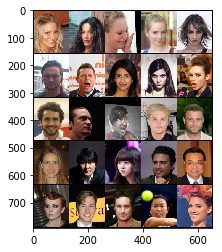

Reconstructed Image:


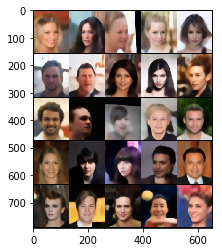

Difference:


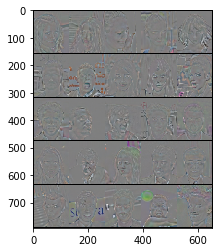

In [10]:

model = get_model().to(device)
model = fm.load_weight(model, '{}_{}'.format(modelname, num_epoch), modelname)
pl.plot_diff(model, trainloader, latent_dim, device, 25, 5)